# Aircraft Fatalities in the World (1908-2019)
### Exploring Aircraft Safety, Damage and Impact
#### Made by Klein Cafa, 100909890

## 1. Introduction
Air travel is one of the most used passenger transportation in the world. But within air travel are risks that can affect passenger and environmental safety. This data provided from kaggle gives an outlook on aviation accidents in the world from the years 1908 to 2019, which includes all civil and commercial aviation accidents with 10 or more fatalities. For this assignment, I explore the types of aircrafts and airlines in the data and whether it has an effect on fatalities that occured within the years. The type of aircraft is important to acknowledge based on the development and structure whether it was fit to fly or not. The airline is also important to acknowledge based on the reputation it had, whether it pressured staff and crew to keep up with guidelines to this day, or whether the airline has enough money in order to keep their aircrafts well maintained. Does a certain aircraft matter whether it is safe to fly? And does a certain airline/operator matter whether it is safe to fly?

![Avianca Flight 52](https://upload.wikimedia.org/wikipedia/commons/1/18/Avianca-Flight-52-Wreckage-1.jpg)
##### *Image Source: https://en.wikipedia.org/wiki/File:Avianca-Flight-52-Wreckage-1.jpg*

## 2. Methods

### 2.1: Data Collection

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

In [2]:
# Load data
aircraft = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')
aircraft

,Date,Year,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,1908.0,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,1909.0,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,1912.0,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,1913.0,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,1913.0,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2: Data Cleaning

The dataset had some awkwardly named columns and unwanted precision in numeric columns, hence tidied up these issues before analyzing.

In [3]:
# Change formatting
pd.set_option('display.precision', 2)
# Rename columns
aircraft.columns = ["Date", "Year", "Time", "Location of Crash", "Airline/Operator", "Flight #", "Route", "Aircraft Type", "Registration #", "cn/ln", "Total # Onboard", "Total # of Passengers Onboard", "Total # of Crew Onboard", "Total # of Fatalities", "Total # of Passenger Fatalities", "Total # of Crew Fatalities", "Total # of Ground Fatalities", "Summary"]
aircraft

,Date,Year,Time,Location of Crash,Airline/Operator,Flight #,Route,Aircraft Type,Registration #,cn/ln,Total # Onboard,Total # of Passengers Onboard,Total # of Crew Onboard,Total # of Fatalities,Total # of Passenger Fatalities,Total # of Crew Fatalities,Total # of Ground Fatalities,Summary
0,09/17/1908,1908.0,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,1909.0,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,1912.0,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,1913.0,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,1913.0,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop rows which contain any missing data for each column [15]
aircraft = aircraft.dropna(axis=0, how='all')
aircraft

,Date,Year,Time,Location of Crash,Airline/Operator,Flight #,Route,Aircraft Type,Registration #,cn/ln,Total # Onboard,Total # of Passengers Onboard,Total # of Crew Onboard,Total # of Fatalities,Total # of Passenger Fatalities,Total # of Crew Fatalities,Total # of Ground Fatalities,Summary
0,09/17/1908,1908.0,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,1909.0,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,1912.0,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,1913.0,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,1913.0,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,04/16/2019,2019.0,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p..."
4963,05/05/2019,2019.0,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...
4964,05/05/2019,2019.0,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...
4965,06/03/2019,2019.0,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.


Below is a generated descriptive statistic on the dataframe. From this, I identified the presence of missing data, which were then removed list-wise. 

In [5]:
aircraft.describe()

,Year,Total # Onboard,Total # of Passengers Onboard,Total # of Crew Onboard,Total # of Fatalities,Total # of Passenger Fatalities,Total # of Crew Fatalities,Total # of Ground Fatalities
count,4967.00,4949.00,4738.00,4741.00,4959.00,4725.00,4726.00,4926.00
mean,1970.68,31.09,26.90,4.48,22.34,19.02,3.58,1.73
std,24.56,45.44,44.01,3.49,35.03,34.11,3.17,55.71
min,1908.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1951.00,7.00,3.00,2.00,4.00,1.00,2.00,0.00
50%,1970.00,16.00,12.00,4.00,11.00,8.00,3.00,0.00
75%,1991.00,35.00,30.00,6.00,25.00,21.00,5.00,0.00
max,2019.00,644.00,614.00,61.00,583.00,560.00,46.00,2750.00


## 3. Analyses

Here, I will explore the relationship between the aircraft and airline used in the crash based on whether the airline has a better reputation with exploratory analyses consisting of statistical summaries and visualizations.

### 3.1 Distributions

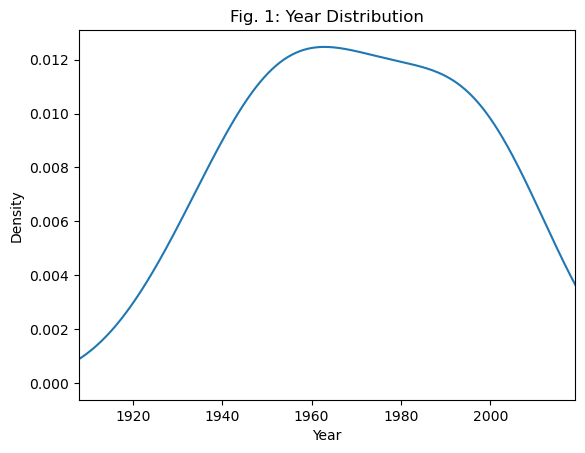

In [6]:
# Kernel Density Estimate
h = aircraft.Year.plot.kde(title="Fig. 1: Year Distribution", xlim = (1908, 2019), bw_method=0.5).set_xlabel("Year")

A countplot is used to visualize the top 20 Airlines/Operators using ChatGPT [5]. 

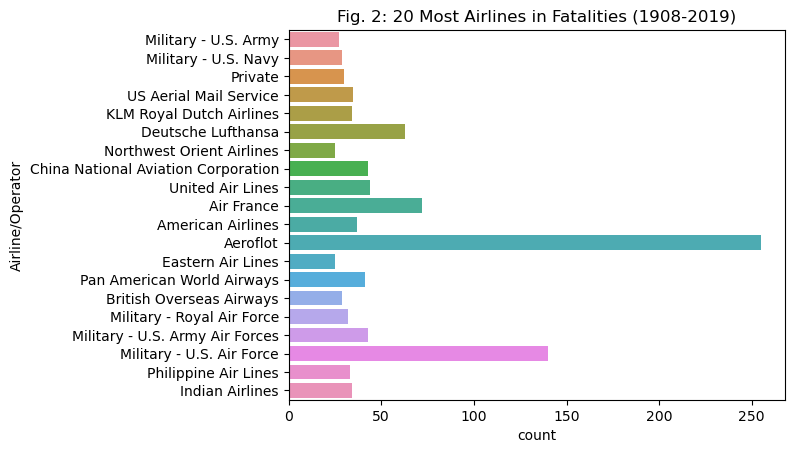

In [7]:
# Get the top 20 most frequent values
top_20 = aircraft["Airline/Operator"].value_counts().head(20).index

# Filter the dataset to include only the top 5
filtered_data = aircraft[aircraft["Airline/Operator"].isin(top_20)]

# Create the countplot
h = sns.countplot(y=filtered_data["Airline/Operator"]).set_title("Fig. 2: 20 Most Airlines in Fatalities (1908-2019)")

A countplot is used to visualize the top 20 aircrafts using ChatGPT [6]. 

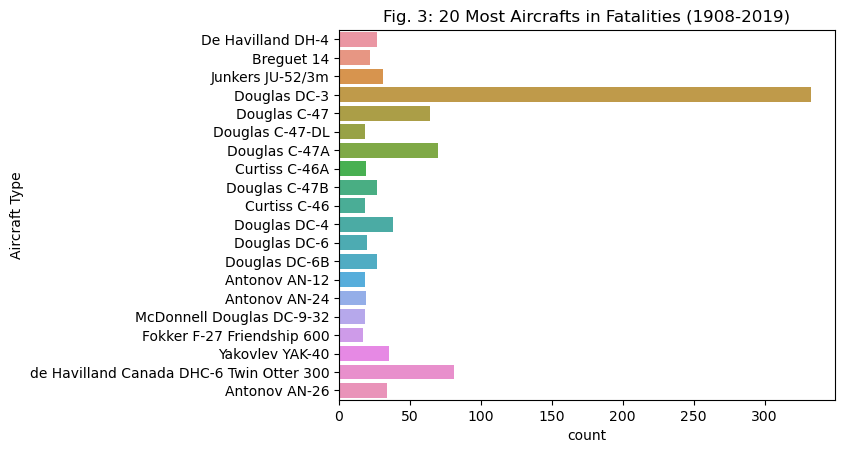

In [8]:
# Get the top 5 most frequent values
top_20 = aircraft["Aircraft Type"].value_counts().head(20).index

# Filter the dataset to include only the top 5
filtered_data = aircraft[aircraft["Aircraft Type"].isin(top_20)]

# Create the countplot
h = sns.countplot(y=filtered_data["Aircraft Type"]).set_title("Fig. 3: 20 Most Aircrafts in Fatalities (1908-2019)")

### 3.2 Relationships
#### 3.2.1 Year and Fatalities

The year of which a fatality has occured is important to note as it can tell us what year had the most fatalities. This can be visualized using a histogram, using the *Kernel Density Estimate**. 

The histogram below includes the year distribution of aviation fatalities and crashes. The histogram comes out to be negative, left skewed. The peak of the histogram is around the year **1960**, where flights before 1960 were not becoming common, and flights after 1960 are starting to become common than the early years before the peak.

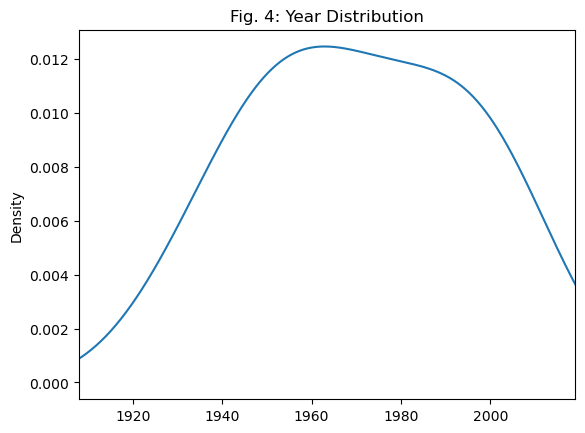

In [9]:
# Kernel Density Estimate
h = aircraft.Year.plot.kde(title="Fig. 4: Year Distribution", xlim = (1908, 2019), bw_method=0.5)

Secondly, I looked into the quartiles based on the years of aircraft crashes and fatalities. Looking into the 50% quartile tells us the median. If we look into the median only on the numbers 1908-2019, it would be 1958. However, the dataset below tells us that the 50% quartile on aviation fatalities is 1970, showing that there are more fatalities around the 1970s rather than the expected 1958 year. 

In [10]:
ds = aircraft.Year.describe()
print(f"25% Quartile of Year: {round(ds['25%'], 2)}")
print(f"50% Quartile of Year: {round(ds['50%'], 2)}")
print(f"75% Quartile of Year: {round(ds['75%'], 2)}")

25% Quartile of Year: 1951.0
50% Quartile of Year: 1970.0
75% Quartile of Year: 1991.0


#### 3.2.2 Total Onboard & Fatalities on Aircraft

There are many types of aircrafts in the world. However, aircraft development and maintenance plays a huge role on fatalities, such as not enough resources and money, lack of maintenance, how an aircraft can keep up with rising technology and changing environments and many more.

The table below presents a summary on the most crashed aircrafts in decreasing order (done by using **.sort_values()**, from ChatGPT [7]), summarised by the total number onboard and fatalities onboard. From the table below, there are a total of 2447 aircrafts involved in a fatality from the years 1908 to 2019 worldwide.

In [11]:
# Select only the relevant columns and group by Aircraft Type
grouped_aircraft = aircraft[["Aircraft Type", "Total # Onboard", "Total # of Fatalities"]].groupby("Aircraft Type").sum()

# Sort by Total # of Fatalities
sorted_grouped_aircraft = grouped_aircraft.sort_values(by="Total # of Fatalities", ascending=False).reset_index()

# Display the result
display(sorted_grouped_aircraft)

,Aircraft Type,Total # Onboard,Total # of Fatalities
0,Douglas DC-3,6141.0,4734.0
1,Douglas C-47,1146.0,1058.0
2,Douglas DC-6B,1323.0,1051.0
3,Antonov AN-26,1130.0,1035.0
4,Ilyushin IL-18B,1236.0,1008.0
...,...,...,...
2442,Hawker Hunter,0.0,0.0
2443,BAC One-Eleven 528FL,85.0,0.0
2444,Sepecat Jaguar A,0.0,0.0
2445,Boeing B-737-7H4,103.0,0.0


In [12]:
# # grouped_aircraft = aircraft.groupby(["Aircraft Type", "Total # of Fatalities"]).size().unstack()
# # display(grouped_aircraft)

# # Group by Aircraft Type and Total # of Fatalities
# grouped_aircraft = aircraft.groupby("Aircraft Type")["Total # of Fatalities"].sum()
# # Sort by total fatalities (optional, for better visualization)
# sorted_grouped_aircraft = grouped_aircraft.sort_values(ascending=False).reset_index()
# display(sorted_grouped_aircraft)

Due to the many types of aircrafts in the dataset, the top 10 most crashed aircrafts based on the total number of fatalities onboard **will be looked at from this point onwards**. This is done by using **.head(10)** [8]. 

In [13]:
# Sort by Total # of Fatalities
sorted_grouped_aircraft = sorted_grouped_aircraft.head(10)

# Display the result
display(sorted_grouped_aircraft)

,Aircraft Type,Total # Onboard,Total # of Fatalities
0,Douglas DC-3,6141.0,4734.0
1,Douglas C-47,1146.0,1058.0
2,Douglas DC-6B,1323.0,1051.0
3,Antonov AN-26,1130.0,1035.0
4,Ilyushin IL-18B,1236.0,1008.0
5,McDonnell Douglas DC-9-32,1227.0,953.0
6,Douglas DC-4,1151.0,891.0
7,de Havilland Canada DHC-6 Twin Otter 300,1152.0,810.0
8,Tupolev TU-134A,1151.0,807.0
9,McDonnell Douglas DC-10-10,1331.0,804.0


Expanding on the table, Figure 5 shows a breakdown on the relation between total onboard & fatalities on aircrafts. 

This is done by using ChatGPT on making a barplot of the table above [11].

Looking into it:
- Each aircraft is proportional between the number of fatalifies and the total number onboard. But, the total number of fatalities is always less than the total onboard.
- One aircraft that stands out on the barplot is that the **Douglas DC-3** has the **most** amount of those onboard, as well as the **most** amount of fatalities onboard, which is way more than the rest of the aircrafts. 
- However, the Douglas DC-3 is still flying to this day [9], with the first flight being in the year 1935 [10]. This aircraft stands out than the rest due to the longevity of how long the aircraft is still in service, recording fatalities since 1935.
- Along with the Douglas DC-3, the **Douglas** aircraft models is the most occuring.

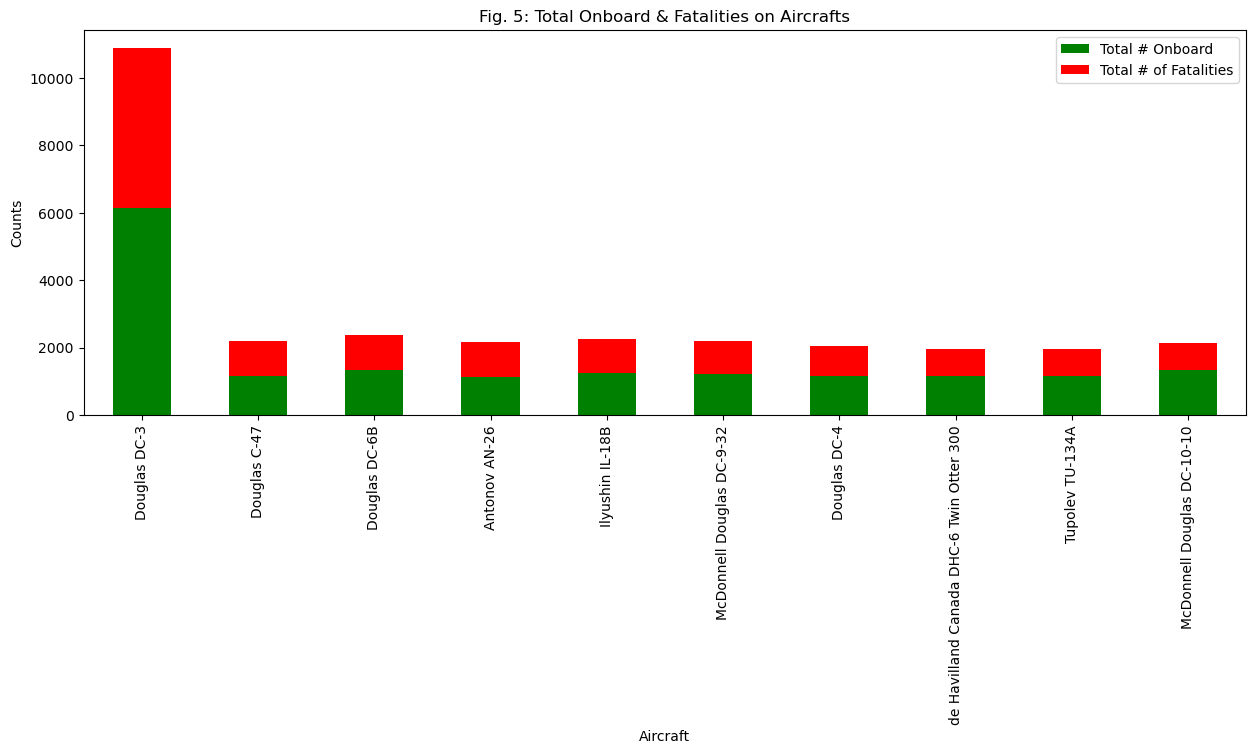

In [14]:


aircraft_fatality_barplot = sorted_grouped_aircraft.plot.bar(
    x = "Aircraft Type",
    y = ["Total # Onboard", "Total # of Fatalities"],
    stacked = True, 
    color = ["green", "red"], 
    figsize=(15,5), 
    title="Fig. 5: Total Onboard & Fatalities on Aircrafts")
plt.ylabel("Counts")
plt.xlabel('Aircraft')
plt.xticks(rotation=90)
plt.show(aircraft_fatality_barplot)

#### 3.2.3: Total Onboard and Fatalities on Airline

Airlines also play a huge role on fatalities. A few factors are kept in mind:
- Reputation comes into consideration depending on how many fatalities a certain airline has. 
- Staff comes into consideration depending on the training, guidelines and conducts when dealing with crashes/fatalities. This can include flight crew, ground crew, airport staff, higher-ranked staff, etc.
- Safety comes into consideration depending on how safe an airline is whether it has improved or not throughout the years.

The table below presents a summary on the most crashed airline/operator in decreasing order (done by using **.sort_values()**, from ChatGPT [12]), summarised by the total number onboard and fatalities onboard. From the table below, there are a total of 2242 airlines/operators involved in a fatality from the years 1908 to 2019 worldwide.

In [15]:
# Select only the relevant columns and group by Aircraft Type
grouped_airline_fatality = aircraft[["Airline/Operator", "Total # Onboard", "Total # of Fatalities"]].groupby("Airline/Operator").sum()

# Sort by Total # of Fatalities
sorted_grouped_airline_fatality = grouped_airline_fatality.sort_values(by="Total # of Fatalities", ascending=False).reset_index()

# Display the result
display(sorted_grouped_airline_fatality)

,Airline/Operator,Total # Onboard,Total # of Fatalities
0,Aeroflot,11332.0,8858.0
1,Military - U.S. Air Force,4074.0,3356.0
2,Air France,2919.0,1757.0
3,American Airlines,2122.0,1422.0
4,Pan American World Airways,3097.0,1303.0
...,...,...,...
2237,Centurian Air Cargo,8.0,0.0
2238,Transcontinental &Western Air,11.0,0.0
2239,Ararat Avia,37.0,0.0
2240,Regional Compagnie Aerienne Europeenne,54.0,0.0


Due to the many types of airlines/operators in the dataset, the top 10 most crashed airlines/operators based on the total number of fatalities onboard **will be looked at from this point onwards**. This is done by using **.head(10)** [8]. 

In [16]:
# Sort by Total # of Fatalities
sorted_grouped_airline_fatality = sorted_grouped_airline_fatality.head(10)

# Display the result
display(sorted_grouped_airline_fatality)


,Airline/Operator,Total # Onboard,Total # of Fatalities
0,Aeroflot,11332.0,8858.0
1,Military - U.S. Air Force,4074.0,3356.0
2,Air France,2919.0,1757.0
3,American Airlines,2122.0,1422.0
4,Pan American World Airways,3097.0,1303.0
5,Military - U.S. Army Air Forces,1100.0,1070.0
6,United Air Lines,2461.0,1019.0
7,AVIANCA,1067.0,941.0
8,Turkish Airlines (THY),956.0,890.0
9,Indian Airlines,1451.0,860.0


Expanding on the table, Figure 6 shows a breakdown on the relation between total onboard & fatalities on airlines/operators. 

This is done by using ChatGPT on making a barplot of the table above [13].

Looking into it:
- The 10 airlines with the most passengers & fatalities have differential data respectively. 
- One particular pattern from this data is that the 10 most airlines have less fatalaties than those onboard, or more fatalities.
- One airline/operator that stands out on the barplot is that **Aeroflot** has the **most** amount of those onboard, as well as the **most** amount of fatalities onboard, which is way more than the rest of the aircrafts. This shows that Aeroflot is known for having the most onboard fatalities than the rest of the airlines. 
- Aeroflot is also the flag carrier of Russia founded in 1923, which explains the high amounts of fatalities due to the Soviet era [14]. 

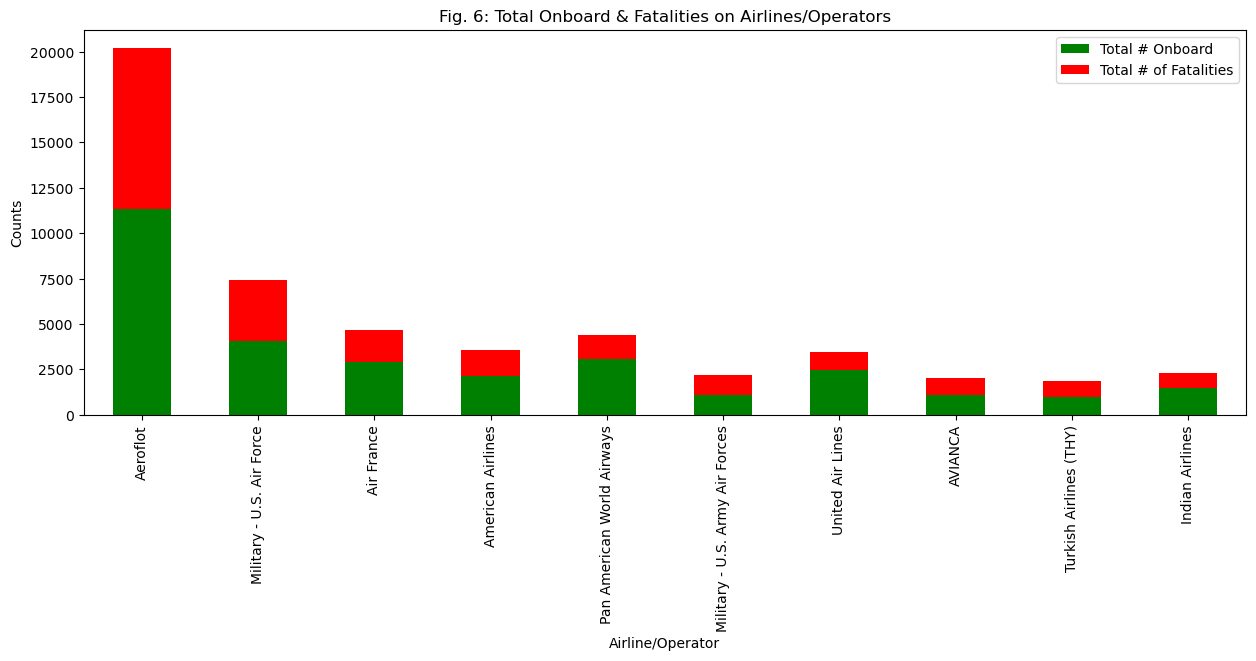

In [17]:
airline_fatality_barplot = sorted_grouped_airline_fatality.plot.bar(
    x = "Airline/Operator",
    y = ["Total # Onboard", "Total # of Fatalities"],
    stacked = True, 
    color = ["green", "red"], 
    figsize=(15,5), 
    title="Fig. 6: Total Onboard & Fatalities on Airlines/Operators")
plt.ylabel("Counts")
plt.xlabel('Airline/Operator')
plt.xticks(rotation=90)
plt.show(airline_fatality_barplot)

### 4. Discussion

Aviation has grown exponentially, becoming one of the most taken human transportation in the world. However, it is impossible to get to where we are now without the help of data like this where fatalities are serious and can help future flights, saving lives. This dataset included the date, aircraft, location, fatality, fatality count and summary, helping me to focus on the survivability based on the airline, aircraft and year. 

From the years 1908 to 2019 in the world:
- A total of **4967 flights** were recorded in the dataset that had a fatality. 
- A total of **2447 aircraft** types were involved in a fatality.
- A total of **2442** airlines were involved in a fatality. 
- Around the year **1960** had the most fatalities than other years (Fig. 1).

Looking into the aircrafts:
- The top 10 aircrafts that had the most fatalities were looked into.
- The **Douglas DC-3** has the most fatalities than any other aircraft, with the Douglas models being the most occuring due to the longevity of service.
- Data between total onboard and total onboard fatalities were proportionate. 

Looking into the airlines/operators:
- The top 10 airlines/operators that had the most fatalities were looked into.
- **Aeroflot** has the most fatalities, where the total onboard and total onboard fatalities were also proportionate.
- With Aeroflot being founded in 1923, the long history of fatalities explains for itself due to the Soviet era. 

The exploratory analysis **does not** support the hypothesis that certain aircrafts and airlines/operators matter whether it is safe to fly fatality wise. With the analysis, I find that the **Douglas DC-3** is the aircraft with the most fatalities, along with the airline **Aeroflot**, having the most fatalities than any other airline in the dataset. However, the history and reason to the aircraft and airline matters, as both have been in service since 1935 and 1923 respectively. 

Each aircraft and airline/operator will always have a fatality. It always depends on how long an aircraft/airline/operator entered the data first, and when it was last recorded. Certain airlines have advantages than other airlines depending on the longevity of service, where an airline still operating to this day since the early 1920s (for example, Aeroflot) continue to maintain safety, where it can look at data like this to see what to improve on. 

### 5. References

1. Source Data: https://www.kaggle.com/datasets/cgurkan/airplane-crash-data-since-1908
2. Pandas for data manipulation
3. Seaborn for data visualization
4. Matplotlib for data visualization
5. [ChatGPT](https://chatgpt.com/) for filtering 20 most airlines/operators using countplot
- Prompt:  
    - i have this seaborn plot  
    h = sns.countplot(y = aircraft["Airline/Operator"])  
    but i want to plot only the top 5 values
6. [ChatGPT](https://chatgpt.com/) for filtering 20 most aircrafts using countplot
- Prompt:
    - i have this seaborn plot  
    h = sns.countplot(y = aircraft["Aircraft Type"])  
    but i want to plot only the top 5 values
7. [ChatGPT](https://chatgpt.com/) for creating a table of most crashed aircrafts on total # of fatalities in decreasing order
- Prompt:
    - i have the following  
    grouped_aircraft = aircraft.groupby(["Aircraft Type", "Total # Onboard",    "Total # of Fatalities"]).size().unstack()  
    display(grouped_aircraft)  
    where Aircraft Type is a string, and total # onboard &  total # of fatalities is int.  
    but i want it to show each aircraft's total # onboard & total # of fatalities, getting the sum of total # of fatalities per aircraft type in decreasing order from most to least  
8. Pandas Documentation - DataFrame .head(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
9. https://www.flightradar24.com/blog/the-future-is-bright-for-the-dc-3/#:~:text=How%20many%20DC%2D3s%20are,South%20Africa%20each%20have%20one
10. https://thehangarmuseum.ca/our-collections/douglas-dc-3#:~:text=The%20Douglas%20DC%2D3%20first,it%20can%20carry%2024%20passengers 
11. [ChatGPT](https://chatgpt.com/) for creating a barplot of the most 10 Airlines/Operators depending on total fatalities.
- Prompt: 
    - how can i make a barplot of the most 10 values  
    grouped_airline_fatality = aircraft.groupby("Airline/Operator")["Total # of Fatalities"].sum()  
    sorted_grouped_airline_fatality = grouped_airline_fatality.sort_values(ascending=False).reset_index()  
    display(sorted_grouped_airline_fatality)
12. [ChatGPT](https://chatgpt.com/) for creating a table of most crashed airlines/operators on total # of fatalities in decreasing order
- Prompt:
    - i have the following  
    grouped_aircraft = aircraft.groupby(["Airline/Operator", "Total # Onboard", "Total # of Fatalities"]).size().unstack()  
    display(grouped_aircraft)  
    where Airline/Operator is a string, and total # onboard &  total # of fatalities is int.  
    but i want it to show each aircraft's total # onboard & total # of fatalities, getting the sum of total # of fatalities per airline in decreasing order from most to least  
13. [ChatGPT](https://chatgpt.com/) for creating a barplot of the most 10 Airlines/Operators depending on total fatalities.
- Prompt:
    - i have the following  
    grouped_aircraft = aircraft.groupby(["Airline/Operator", "Total # Onboard", "Total # of Fatalities"]).size().unstack()  
    display(grouped_aircraft)  
    where Airline/Operator is a string, and total # onboard &  total # of fatalities is int.  
    but i want it to show each aircraft's total # onboard & total # of fatalities, getting the sum of total # of fatalities per airline in decreasing order from most to least  
14. History of Aeroflot: https://ir.aeroflot.com/en/company-overview/about-aeroflot/
15. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

